Enter the name of file with location:
m13_second_star1


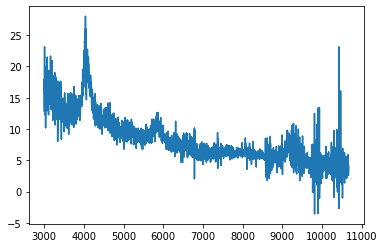

Where to cut? put 'max' or row number:
max
520


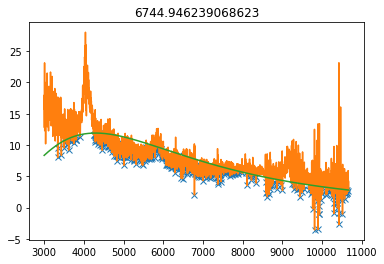

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[9]:

#STAR1--------------------------------------------------------------------------------

from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit as cfit
import scipy.constants as s
import matplotlib.pyplot as plt
from scipy.signal import find_peaks as fp
k = input("Enter the name of file with location:\n")
k = k+".fits"
dat = fits.open(k)
dat_whole = dat[1].data
dat = dat_whole['flux']
wvl=np.arange(3000,(len(dat)*2)+3000,2)
l=wvl*10**-10
def B(l,T,n):
    t=(n*2*s.h*s.c**2)/((l**5)*(np.exp((s.h*s.c)/(l*s.k*T))-1))
    return t
plt.plot(wvl,dat)
plt.show()
inp = input("Where to cut? put 'max' or row number:\n")
if inp=='max':
    cut = np.argmax(dat)
else:
    cut=inp

cut=int(cut)
print(cut)
val, var = cfit(B,l[cut:],dat[cut:],p0=[3000,1])
peaks,_=fp((B(l,val[0],val[1])-dat), height=0,prominence=0.05)
wvlpk = (peaks*2+3000)
plt.plot(wvlpk,dat[peaks],"x")
plt.plot(wvl,dat)
plt.title(val[0])
plt.plot(wvl,B(l,val[0],val[1]))
plt.show()